<a href="https://colab.research.google.com/github/malkang92/skku_ML/blob/main/6%EC%A3%BC%EC%B0%A8_MLP_%EC%8B%A4%EC%8A%B51_%EC%9D%B4%EA%B0%95%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습_첫번째_XOR 문제와 다층 퍼셉트론


In [1]:
from google import colab
colab.drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# %cd /content/Multi_Layer_Perceptron
#코랩 탭의 파일구조 내에서 위에서 복제한 실습 자료가 있는 폴더로 이동한다.
#학술망에서 저장된 이미지를 출력하기 위해 필요한 코드이다.

## [1] 실습 진행 관련 설명

- XOR 문제를 해결하는 XOR 게이트
         1). 논리회로를 통한 구현 (Numpy)
         2). Python 함수와 Tensorflow 함수를 활용한 다층 퍼셉트론 직접 구현
         3). Tensorflow 라이브러리의 모듈을 활용한 간단한 구현

## [2] 코드 구현의 흐름


        1. (데이터 측면) XOR 입력 데이터 정의

        2. (모델 측면) 가중치, 바이어스, 활성화 함수, 손실 함수 정의

        3. (모델 및 학습 과정) 학습 과정을 직접 구현 또는 텐서플로우 라이브러리의 간단한 함수로 간접 구현하여 다층 퍼셉트론 모델을 학습
        - 손실함수와 학습 데이터에 대한 정확도 그래프의 변화 관찰

        4. (성능 평가) 테스트 데이터를 이용하여 학습된 모델에 대한 성능 평가하기.
        - 최종 분류 정확도와 혼동 행렬

# 1. XOR 문제의 해결 방법 (MLP XOR Solution)

- XOR 문제 또한 0 또는 1 이진 분류 문제에 해당하며, 단층 퍼셉트론으로는 해결할 수 없는 특별한 케이스이다.
- 두 입력 값이 서로 같으면 0, 서로 다르면 1로 분류하는 논리회로와 같다.



<img src="https://github.com/ballade8/Multi_Layer_Perceptron/blob/main/XORgate2.png?raw=true" width="600"/>


In [3]:
from PIL import Image # 이미지 출력 함수
#Image.open("/content/Multi_Layer_Perceptron/XORgate2.png")

- 다층 퍼셉트론(Multi-layer Perceptron)
  즉, 두개 이상의 선을 이용하기 위해 은닉층이 1개 이상 필요하다.

## 1) XOR 게이트를 3개의 퍼셉트론을 이용하여 표현해보자.
(NAND, OR, AND 게이트를 나타내기 위해서, 각 단층 퍼셉트론은 3개의 입력 노드(바이어스 포함)와 1개의 출력 노드로 구성되어 있다. 입력 노드와 출력 노드 사이에 가중치로 연결되어 있다. 출력 노드는 3개의 입력 노드와 각 대응되는 가중치의 곱의 합인 가중합과 활성화함수(ex. 계단함수)를 거쳐 출력한다.


<img src="https://github.com/ballade8/Multi_Layer_Perceptron/blob/main/XORgate.png?raw=true" width="600"/>

In [ ]:
from PIL import Image # 이미지 출력 함수
#Image.open("/content/Multi_Layer_Perceptron/XORgate.png")

In [ ]:
import numpy as np

w_nand = np.array([-2,-2]) # NAND의 동작을 하는 퍼셉트론의 가중치
w_or = np.array([2,2])     # OR의 동작을 하는 퍼셉트론의 가중치
w_and = np.array([1,1])    # AND의 동작을 하는 퍼셉트론의 가중치
bias_nand = 3              # NAND의 동작을 하는 퍼셉트론의 바이어스(w0)
bias_or = -1               # OR의 동작을 하는 퍼셉트론의 바이어스(w0)
bias_and = -1              # AND의 동작을 하는 퍼셉트론의 바이어스(w0)

In [1]:
import numpy as np

w_nand = np.array([-2, -2])
w_or = np.array([2,2])
w_and = np.array([1,1])
bias_nand = 3
bias_or = -1
bias_and = -1

In [ ]:
def Perceptron(x,w,bias): # 퍼셉트론의 순전파의 과정을 잘 생각해보자
  z = np.sum(w*x)+bias
  y_hat = z
  if y_hat <=0: # y 값이 0 이하면 return 0
    return 0
  else:	# y 값이 0 넘으면 return 1
    return 1

In [2]:
def Perceptron(x,w,bias):
  z = np.sum(w*x)+bias
  y_hat = z
  if y_hat <= 0:
    return 0
  else:
    return 1

In [ ]:
# NAND 게이트
def NAND(x1,x2):
  return Perceptron(np.array([x1,x2]),w_nand,bias_nand)

# OR 게이트
def OR(x1,x2):
  return Perceptron(np.array([x1,x2]),w_or,bias_or)

# AND 게이트
def AND(x1,x2):
  return Perceptron(np.array([x1,x2]),w_and,bias_and)

# XOR 게이트
def XOR(x1,x2):
  return AND(NAND(x1,x2),OR(x1,x2))

In [3]:
def NAND(x1, x2):
  return Perceptron(np.array([x1,x2]), w_nand, bias_nand)

def OR(x1, x2):
  return Perceptron(np.array([x1,x2]), w_or, bias_or)

def AND(x1, x2):
  return Perceptron(np.array([x1,x2]), w_and, bias_and)

def XOR(x1, x2):
  return AND(NAND(x1, x2), OR(x1, x2))

In [ ]:
for x in [(0,0),(1,0),(0,1),(1,1)]: #학습되는 데이터의 형태를 잘 생각해보자
  y_hat = XOR(x[0],x[1]) # XOR동작은 위의 구현처럼 NAND OR AND 게이트 3개의 퍼셉트론을 이용하여 동작한다
  print("입력 값: "+ str(x)+ " 출력 값: "+ str(y_hat))

y = [(0, 1, 1, 0)]
y = np.array(y)
print("실제 값: "+ str(y) )

In [4]:
for x in [(0,0), (1,0), (0,1), (1,1)]:
  y_hat = XOR(x[0], x[1])
  print("입력 값:" + str(x) + " 출력 값: "+str(y_hat))

입력 값:(0, 0) 출력 값: 0
입력 값:(1, 0) 출력 값: 1
입력 값:(0, 1) 출력 값: 1
입력 값:(1, 1) 출력 값: 0


In [5]:
y = [(0, 1, 1, 0)]
y = np.array(y)
print("실제 값: "+str(y))

실제 값: [[0 1 1 0]]


In [6]:
np.array([[0],[1],[1],[0]])
np.array([0,1,1,0])

array([0, 1, 1, 0])

In [7]:
np.array([[0],[1],[1],[0]]).shape

(4, 1)

In [8]:
np.array([0,1,1,0]).shape

(4,)

## 2) XOR 게이트를 다층 퍼셉트론 모델로 학습을 통해 구현하자.(직접 구현)
(랜덤 초기값 가중치, Sigmoid 활성화 함수를 이용하여 적절한 가중치를 학습을 통해 스스로 찾음)

Multi-Layer Perceptron Architecture

<img src="https://github.com/ballade8/Multi_Layer_Perceptron/blob/main/backporp22.png?raw=true" width="600"/>

In [ ]:
from PIL import Image # 이미지 출력 함수
#Image.open("/content/Multi_Layer_Perceptron/backporp22.png")

In [ ]:
# 텐서플로우 활용
# 텐서플로우란 머신러닝 라이브러리의 일종으로 머신러닝, 딥러닝 등의 모델 구현을 좀 더 쉽게 구현할 수 있도록 도와주는 라이브러리이다.
# sklearn과 비슷하게 기계학습을 위한 함수들의 묶음으로 생각하자.
import tensorflow as tf
import matplotlib.pyplot as plt
tf.random.set_seed(2)
# seed를 설정하게 되면 random하게 뽑히는 값이 여러번 실행해도 동일한 값이 뽑히게 된다.
# 머신러닝 환경에서 중요한 요소 중 하나는 코드 실행했을 때 나오는 결과를 재현 할 수 있어야하는데, 해당 seed를 설정했을 때는 항상 동일한 값이 나오도록 설정해주는 것이다.
# seed를 변경해가며 random한 가중치의 초기값에 따라 결과가 어떻게 변하는지 확인해보자.

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.random.set_seed(2)

### Tensorflow에 입력될 데이터 정의
먼저 학습 데이터 모양(shape)을 정의한다.
XOR 학습 데이터에는 입력 X와 출력 Y가 있다다.

X는 아래와 같이 [4,2] 형태로,
[0, 0], [0, 1], [1, 0], [1, 1]

Y는 아래와 같이 [4,1] 형태로,
[[0], [1], [1], [0]]

In [10]:
# train data
# xor 데이터 전체 데이터를 하나의 리스트에 묶는다
X = [[0.,0.],[0.,1.],[1.,0.],[1.,1.]]
Y = [[0.],[1.],[1.],[0.]]

In [11]:
len(X)

4

### 첫번째 은닉층 구현

In [40]:
## tf.Variable 이란 TensorFlow 라이브러리에서 선언하는 변수로 tf.Variable(value, name, dtype, shape) 의 메소드를 사용해서 만든다.
### 모델 학습을 통해 변수는 새롭게 업데이트되기 때문에 가중치를 선언할 때 주로 사용

# 첫번째 은닉층 노드에서 가중합 연산을 수행하는 가중치들(0번째)을 랜덤한 값으로 초기화하여 정의한다.
W1_0 = tf.Variable(tf.random.uniform(shape=[2,2]))
# "print(W1_0)"으로 W1_0의 값을 확인해보자.
# 첫번째 은닉층 노드에서 가중합 연산을 수행하는 바이어스(0번째)를 선언한다
W0_0 = tf.Variable(tf.ones(shape=[2]))
# "print(W0_0)"으로 W0_0의 값을 확인해보자.
# 첫번째 은닉층의 가중합인 Z_1 의 연산은 다음과 같다.
Z_1 = tf.matmul(X, W1_0) + W0_0
# 여기서 X는 (4, 2)의 형태임에 주의하자.
# (4, 2)의 모양을 하고 있는 "tf.matmul(X, W1_0)"의 결과물에
# (2,)의 모양을 하고 있는 "W0_0"을 더하면 브로드캐스팅에 의해
#  "tf.matmul(X, W1_0)"의 네 개의 행에 동일한 "W0_0"가 더해진다.
# 첫번째 은닉층 노드들의 활성화 함수를 거친 출력값 H_1 은 다음과 같다.
# 활성화 함수는 sigmoid function
H_1 = tf.sigmoid(Z_1)

In [12]:
a = tf.random.uniform(shape=[2,2])
print(a)
W1_0 = tf.Variable(tf.random.uniform(shape=[2,2])) # tf.Variable(value, name, dtype, shape)
print(W1_0)
print(W1_0.shape)

tf.Tensor(
[[0.14690244 0.46425676]
 [0.22489977 0.35288846]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.6266953 , 0.99403536],
       [0.5183847 , 0.7920568 ]], dtype=float32)>
(2, 2)


In [13]:
b = tf.ones(shape=[2])
print(b)
W0_0 = tf.Variable(tf.ones(shape=[2]))
print(W0_0)
print(W0_0.shape)

tf.Tensor([1. 1.], shape=(2,), dtype=float32)
<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 1.], dtype=float32)>
(2,)


In [14]:
Z_1 = tf.matmul(X, W1_0) + W0_0
print(Z_1.shape)

(4, 2)


In [15]:
H_1 = tf.sigmoid(Z_1)
print(H_1)
print(H_1.shape)

tf.Tensor(
[[0.73105854 0.73105854]
 [0.8203005  0.8571793 ]
 [0.83571637 0.8801694 ]
 [0.8952081  0.9419196 ]], shape=(4, 2), dtype=float32)
(4, 2)


### 두번째 출력층 구현

In [41]:
# 두번째 출력층 노드에서 가중합 연산을 수행하는 가중치(1번째)를 랜덤한 값으로 초기화하여 정의한다
W1_1 = tf.Variable(tf.random.uniform([2,1]))
# 두번째 출력층 노드에서 가중합 연산을 수행하는 바이어스(1번째)를 선언한다
W0_1 = tf.Variable(tf.ones([1]))
# 두번째 출력층의 가중합인 Z_2 의 연산은 다음과 같다.
Z_2 = tf.matmul(H_1, W1_1) + W0_1
# 두번째 출력층 노드들의 활성화 함수를 거친 출력값 H_2=Y_hat 은 다음과 같다.
# 활성화 함수는 sigmoid function
Y_hat = tf.sigmoid(Z_2)

In [16]:
c = tf.random.uniform(shape=[2,1])
print(c)
W1_1 = tf.Variable(tf.random.uniform([2,1]))
print(W1_1)
print(W1_1.shape)

tf.Tensor(
[[0.47942936]
 [0.16440785]], shape=(2, 1), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.16673577],
       [0.79962385]], dtype=float32)>
(2, 1)


In [17]:
d = tf.ones([1])
print(d)
W0_1 = tf.Variable(tf.ones([1]))
print(W0_1)
print(W0_1.shape)

tf.Tensor([1.], shape=(1,), dtype=float32)
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.], dtype=float32)>
(1,)


In [18]:
Z_2 = tf.matmul(H_1, W1_1) + W0_1
print(Z_2.shape)

(4, 1)


In [19]:
Y_hat = tf.sigmoid(Z_2)
print(Y_hat)
print(Y_hat.shape)

tf.Tensor(
[[0.84637725]
 [0.86082923]
 [0.8633206 ]
 [0.870168  ]], shape=(4, 1), dtype=float32)
(4, 1)


### 손실함수를 정의
- 바이너리 크로스 엔트로피(Binary Cross Entropy)


In [45]:
# 텐서플로우 라이브러리의 케라스 라이브러리로부터 BinaryCrossentropy 손실함수를 불러온다.
# 로지스틱 회귀 실습에서 이용한 적이 있는 손실함수이다.
# tensorflow의 keras가 제공하는 losses 패키지로부터 불러온 BinaryCrossentropy()를
# loss_object라고 호칭해주면 "tf.keras.losses.BinaryCrossentropy()"를 사용할 준비가 된 것이다.
loss_object = tf.keras.losses.BinaryCrossentropy()
loss = loss_object(Y, Y_hat)

# 참고로 손실함수를 풀어 쓰면 아래와 같다.
# tf.reduce_mean(-1*((Y*tf.math.log(Y_hat))+((1-Y)*tf.math.log(1.0-Y_hat))))

loss_list = []
accuracy_list = []
# 학습이 반복될 때마다 계산된 발생한 오차와 모델의 정확도를 저장하기 위해 리스트를 선언한다

ValueError: Expected an instance of list, got <tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.88095194],
       [0.8954481 ],
       [0.8852881 ],
       [0.8982926 ]], dtype=float32)>.

In [20]:
# Y가 list일 경우 ValueError 발생
# 정답 레이블 Y를 명시적으로 tf.Tensor로 변환
Y_tensor = tf.constant(Y, dtype=tf.float32)

In [21]:
loss_object = tf.keras.losses.BinaryCrossentropy()
loss = loss_object(Y_tensor, Y_hat)

In [22]:
loss_list = []
accuracy_list = []

### 가중치 업데이트
- 텐서플로우 2.0 버전 이후부터 기본 최적화 기법을 SGD(Stochastic Gradient Descent)로 사용한다.

- 경사 하강법은 정확하게 가중치를 찾아가지만 가중치를 변경할때마다 전체 데이터에 대해 미분해야 하므로 계산량이 매우 많다. 즉 많은 계산량때문에 속도가 느리고, 추가적으로 최적해를 찾기 전 로컬 미니멈에서 벗어나지 못하는 경우가 발생한다.
- tf.train.GradientDescentOptimizer()  (구 버전 GradientDescentOptimizer 거의 사용하지 않음.)

**SGD (Stochastic Gradient Descent)**

SGD는 전체 훈련 데이터 N개에 대하여 랜덤하게 섞는 다음에 각 1개 훈련 데이터씩에 대하여 경사하강법으로 가중치를 업데이트하는 학습 방법이다.

Momentum(모멘텀)은 모델의 인자를 갱신할 때, 이제까지 학습했던 바와 같이 손실함수(목적함수)의 그레디언트만 활용하는 것이 아니라, 과거 계산된 그레디언트를 축적해서 활용하는 방법이라고 간단하게 이해하자. 수식으로 정의하면 보다 명확해지나, 인공지능입문에서 모멘텀의 수식적인 정의는 교육 범위를 벗어남.

In [ ]:
## 확률적 경사 하강법(Stochastic Gradient Descent, SGD)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

## 모든 훈련 데이터에 대하여 경사하강법으로 가중치를 업데이트 하는 것이 아니라, SGD는 전체 훈련 데이터를 랜덤하게 섞는 다음에 각 1개 훈련 데이터씩 경사하강법으로 가중치를 업데이트 한다. (전체 훈련데이터 N개를 1개씩 차례대로 경사하강법으로 가중치 업데이트를 반복)
## 경사 하강법의 한계점을 빠른속도와 함께 작은 반복횟수로 어느정도 극복 가능하다.

# 참고. Momentum(모멘텀) 계수를 추가로 활용할 수 있다
## 모멘텀(관성)은 경사하강법을 통해 가중치가 최적해로 이동하는 과정에서 일종의 '관성'을 부여하는 것이다. 장점으로는 적은 반복 회수로 가중치를 최적해로 수렴하기가 용이하고, 로컬 미니멈 문제를 일부 해결 할 수가 있다.
## 여기서 최적해는 손실함수를 가장 최소화하는 지점에서의 가중치 값을 의미한다.

In [27]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)


<img src="https://github.com/ballade8/Multi_Layer_Perceptron/blob/main/sgd_momentum.png?raw=true" width="600"/>

In [ ]:
from PIL import Image # 이미지 출력 함수
#Image.open("/content/Multi_Layer_Perceptron/sgd_momentum.png")

### 학습 과정 구현

In [39]:
epoch = 1000
for i in range(epoch):  # 반복횟수 epoch를 바꿔서 학습을 추가로 진행할 수 있다
  # tensorflow의 GradientTape이 사용되었다.
  # 현재 코드셀에서는 "gradients = tape.gradient(loss, [W1_0, W0_0, W1_1, W0_1])"에서 사용되는데
  # 그 전에 "with tf.GradientTape() as tape"의 "with ~ as ~" 문을 살펴보자.
  # "with tf.GradientTape() as tape"에서는 tensorflow의 GradientTape()라는 구조("객체"라고 한다)를
  # 가져와서 활용하고자 한다. 이 개체에는 들여쓰기로 표현된 "H_1 = "부터 "accuracy = "까지의
  # 연산결과가 기록되고(이 연산은 다층퍼셉트론의 1회 순전파에 해당됨을 눈치채었는가?)
  # 해당 연산들이 종료되면 tape 객체가 다음 줄의 함수 연산에서 할용된다.
    with tf.GradientTape() as tape:
        # 첫번째 은닉층에서의 순전파 연산의 출력
        H_1 = tf.sigmoid(tf.matmul(X, W1_0) + W0_0)
        # 두번째 출력층에서의 순전파 연산의 출력(최종 출력)
        Y_hat = tf.sigmoid(tf.matmul(H_1, W1_1) + W0_1)
        # 손실함수 연산, 위에서 정의했다.
        #loss = loss_object(Y, Y_hat) 오류 발생
        loss = loss_object(Y_tensor, Y_hat)
        # 학습데이터에 대한 정확도 연산
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.round(Y_hat), Y), dtype=tf.float32))
        ## Y와 Y_hat 값이 서로 일치하는지 여부를 cast 함수가 0(False) 또는 1(True)로 변환해준다.
        ## 변환된 결과들의 평균값(reduce_mean 함수)을 정확도로 사용할 수 있다.

    # 다층퍼셉트론의 순전파 연산이 종료되면
    # 아래 코드와 같이 tape에 저장된 연산 결과를 활용하여 그레디언트를 계산하는데
    # "tape.gradient(loss, [W1_0, W0_0, W1_1, W0_1])"
    # 구체적으로 설명하면 "loss"값을 활용하여 W1_0, W0_0, W1_1, W0_1에 대한
    # 그레디언트를 계산하게 된다.
    # 그래디언트 연산
    gradients = tape.gradient(loss, [W1_0, W0_0, W1_1, W0_1])
    #optimizer을 통해 모델의 가중치 업데이트가 진행된다.
    # "zip"은 그레디언트 계산 결과와 W1_0, W0_0, W1_1, W0_1를 각각 쌍을 맺어준다.
    # W1_0와 이에 해당하는 그레디언트, W0_0와 이에 해당하는 그레디언트,
    # W1_1와 이에 해당하는 그레디언트의 씩으로 쌍이 맺어진다고 이해하자.
    # 그 후 갱신하고 싶은 인자에 계산된 그레디언트를 "apply_gradients"를 적용하여
    # 실제로 계산한다.
    optimizer.apply_gradients(zip(gradients, [W1_0, W0_0, W1_1, W0_1]))

    # 학습된 결과를 100번째 epoch마다 출력해준다.
    if i % 100 == 0:
         print('Epoch : ', i)
         print('Output : ', Y_hat.numpy())
         print('Loss : ', loss.numpy())
         print('Accuracy : ', accuracy.numpy())

         loss_list.append(loss.numpy())
         accuracy_list.append(accuracy.numpy())
         # 결과를 전부 리스트로 저장한다.

print('Final Output : ', Y_hat.numpy())

Epoch :  0
Output :  [[0.00780907]
 [0.994277  ]
 [0.9943228 ]
 [0.00605463]]
Loss :  0.0063363938
Accuracy :  1.0
Epoch :  100
Output :  [[0.00733885]
 [0.99463844]
 [0.99468005]
 [0.00566105]]
Loss :  0.0059383083
Accuracy :  1.0
Epoch :  200
Output :  [[0.00692173]
 [0.9949574 ]
 [0.9949955 ]
 [0.00531488]]
Loss :  0.0055868234
Accuracy :  1.0
Epoch :  300
Output :  [[0.00654921]
 [0.99524087]
 [0.99527586]
 [0.00500801]]
Loss :  0.0052743093
Accuracy :  1.0
Epoch :  400
Output :  [[0.00621453]
 [0.99549454]
 [0.9955268 ]
 [0.00473425]]
Loss :  0.004994572
Accuracy :  1.0
Epoch :  500
Output :  [[0.0059122 ]
 [0.9957227 ]
 [0.99575263]
 [0.00448847]]
Loss :  0.004742794
Accuracy :  1.0
Epoch :  600
Output :  [[0.00563778]
 [0.9959291 ]
 [0.99595696]
 [0.00426667]]
Loss :  0.0045149876
Accuracy :  1.0
Epoch :  700
Output :  [[0.00538758]
 [0.99611676]
 [0.99614275]
 [0.00406547]]
Loss :  0.0043078563
Accuracy :  1.0
Epoch :  800
Output :  [[0.00515854]
 [0.99628794]
 [0.99631226]
 [0

In [35]:
epoch = 2000
for i in range(epoch):
  with tf.GradientTape() as tape:
    H_1 = tf.sigmoid(tf.matmul(X, W1_0) + W0_0)
    y_hat = tf.sigmoid(tf.matmul(H_1, W1_1) + W0_1)
    loss = loss_object(Y_tensor, Y_hat)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.round(y_hat), Y_tensor), dtype=tf.float32))

  gradients = tape.gradient(loss, [W1_0, W0_0, W1_1, W0_1])
  optimizer.apply_gradients(zip(gradients, [W1_0, W0_0, W1_1, W0_1]))

  if i % 100 == 0:
    print('Epoch : ', i)
    print('Output : ', Y_hat.numpy())
    print('Loss : ', loss.numpy())
    print('Accuracy : ', accuracy.numpy())

    loss_list.append(loss.numpy())
    accuracy_list.append(accuracy.numpy())

print('Final Output : ', Y_hat.numpy())


ValueError: No gradients provided for any variable.

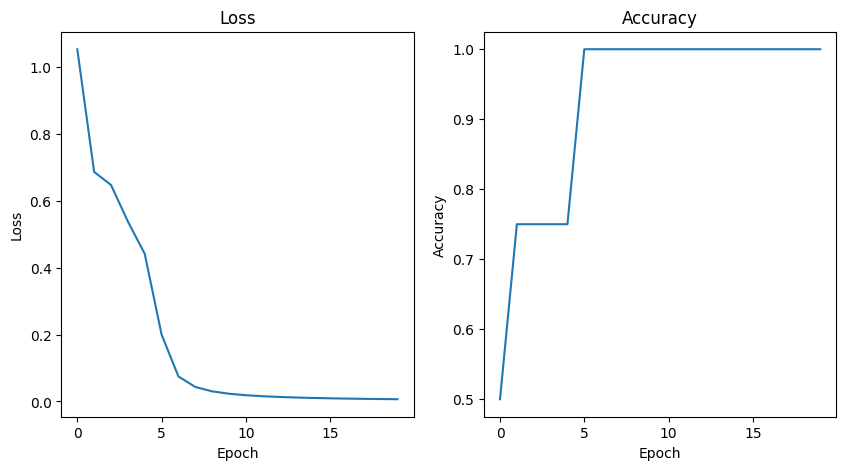

In [36]:
# epoch 별로 저장된 loss와 정확도를 출력해주는 그래프를 시각화한다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(loss_list) # 모델의 오차
ax1.set_title('Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax2.plot(accuracy_list) # 모델의 정확도
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
plt.show()

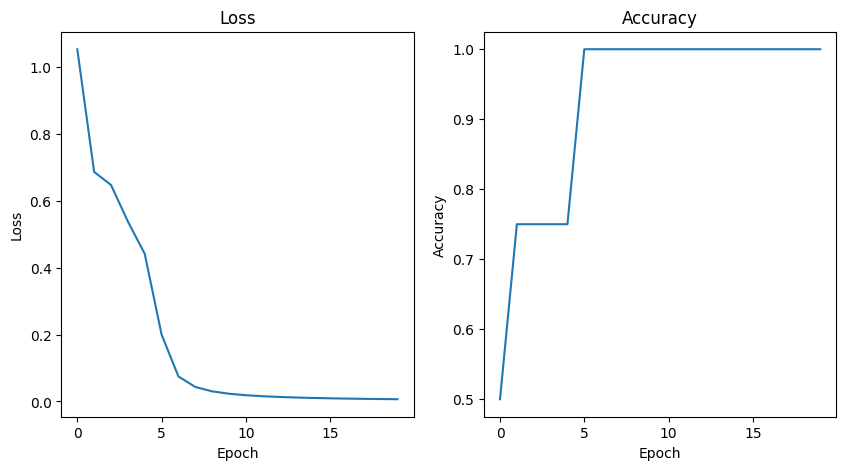

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(loss_list)
ax1.set_title('Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

ax2.plot(accuracy_list)
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
plt.show()

## 3). XOR 게이트를 Tensorflow 2.0, Keras를 활용해서 간단하게 구현하자.
- 장점 : 코드가 짧아짐. 모델 요약(Model Summary) 및 시각화(Visualization)
- Multi-Layer Perceptron Architecture (2)번과 동일한 구현




<img src="https://github.com/ballade8/Multi_Layer_Perceptron/blob/main/backporp22.png?raw=true" width="600"/>

In [ ]:
# 우리가 배운 대부분의 이론 내용들이 Tensorflow와 같은 라이브러리에서 간편한 명령어로 구현되어 있다.
# tensorflow.keras 라이브러리로부터 주요 기능을 가져다가 간편하게 사용해보자.

import tensorflow as tf # tf로 짧게 선언
from tensorflow.keras.layers import Input, Dense # 모델의 세부구성과 관련된 함수
from tensorflow.keras.models import Model # 모델을 정의하는 함수
from tensorflow.keras.optimizers import SGD # 경사하강법 함수
from tensorflow.keras.losses import BinaryCrossentropy # 손실함수 정의
from tensorflow.keras.utils import plot_model # 시각화 함수

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import plot_model

### 입력데이터 정의 : train data

In [41]:
#학습 데이터 선언
#XOR 데이터
train__X = [[0,0],[0,1],[1,0],[1,1]]
train_Y = [[0],[1],[1],[0]]

In [53]:
# 리스트를 Numpy배열로 변환
train__X_np = np.array(train__X, dtype=np.float32)
train_Y_np = np.array(train_Y, dtype=np.float32)

In [49]:
print(type(train__X))
print(type(train_Y))

<class 'list'>
<class 'list'>


### 모델 구축


In [ ]:
#입력층
## 특징벡터의 성분 개수
inputs = Input(shape=(2,))

#은닉층 1개, 은닉노드 2개(바이어스 노드 제외)
## 은닉층의 구성은 사용자가 마음대로 구성할 수 있다. 그 대신 많을수록 연산량이 증가한다.
hidden_layer = Dense(2, activation='sigmoid')(inputs)
## Dense 함수는 텐서플로우의 다층 퍼셉트론 모델에서 은닉층과 출력층의 노드를 선언할 때 쓰이는 함수이다.

#출력층
## 실제값의 성분 개수
output_layer = Dense(1, activation='sigmoid')(hidden_layer)

# Model 함수는 텐서플로우에서 모델의 형태를 선언하는 함수이다.
model = Model(inputs=inputs, outputs=output_layer)

In [59]:
inputs = Input(shape=(2,))
hidden_layer = Dense(2, activation='sigmoid')(inputs)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)
model = Model(inputs=inputs, outputs=output_layer)

### 옵티마이저와 손실함수 정의

In [ ]:
optimizer = SGD(learning_rate=0.02, momentum=0.9)
# 2)번의 직접 구현한 코드에서 등장하여 설명한 SGD와 모멘텀을 사용한다.

loss_object = BinaryCrossentropy()
# 손실함수를 정의한다.

In [60]:
optimizer = SGD(learning_rate=0.02, momentum=0.9)
loss_object = BinaryCrossentropy()

### 모델에 필요한 추가 인자를 조립(컴파일)

In [ ]:
model.compile(optimizer=optimizer, loss=loss_object, metrics=['accuracy'])
#위에서 정의한 학습에 사용되어야할 옵티마이저, 손실함수, 모델 성능 지표를 모델의 인자로 조립(컴파일)해준다.

In [61]:
model.compile(optimizer=optimizer, loss=loss_object, metrics=['accuracy'])

### 구축이 완료된 모델을 요약

In [62]:
model.summary()
#구축이 완료된 모델의 형태를 확인 가능

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

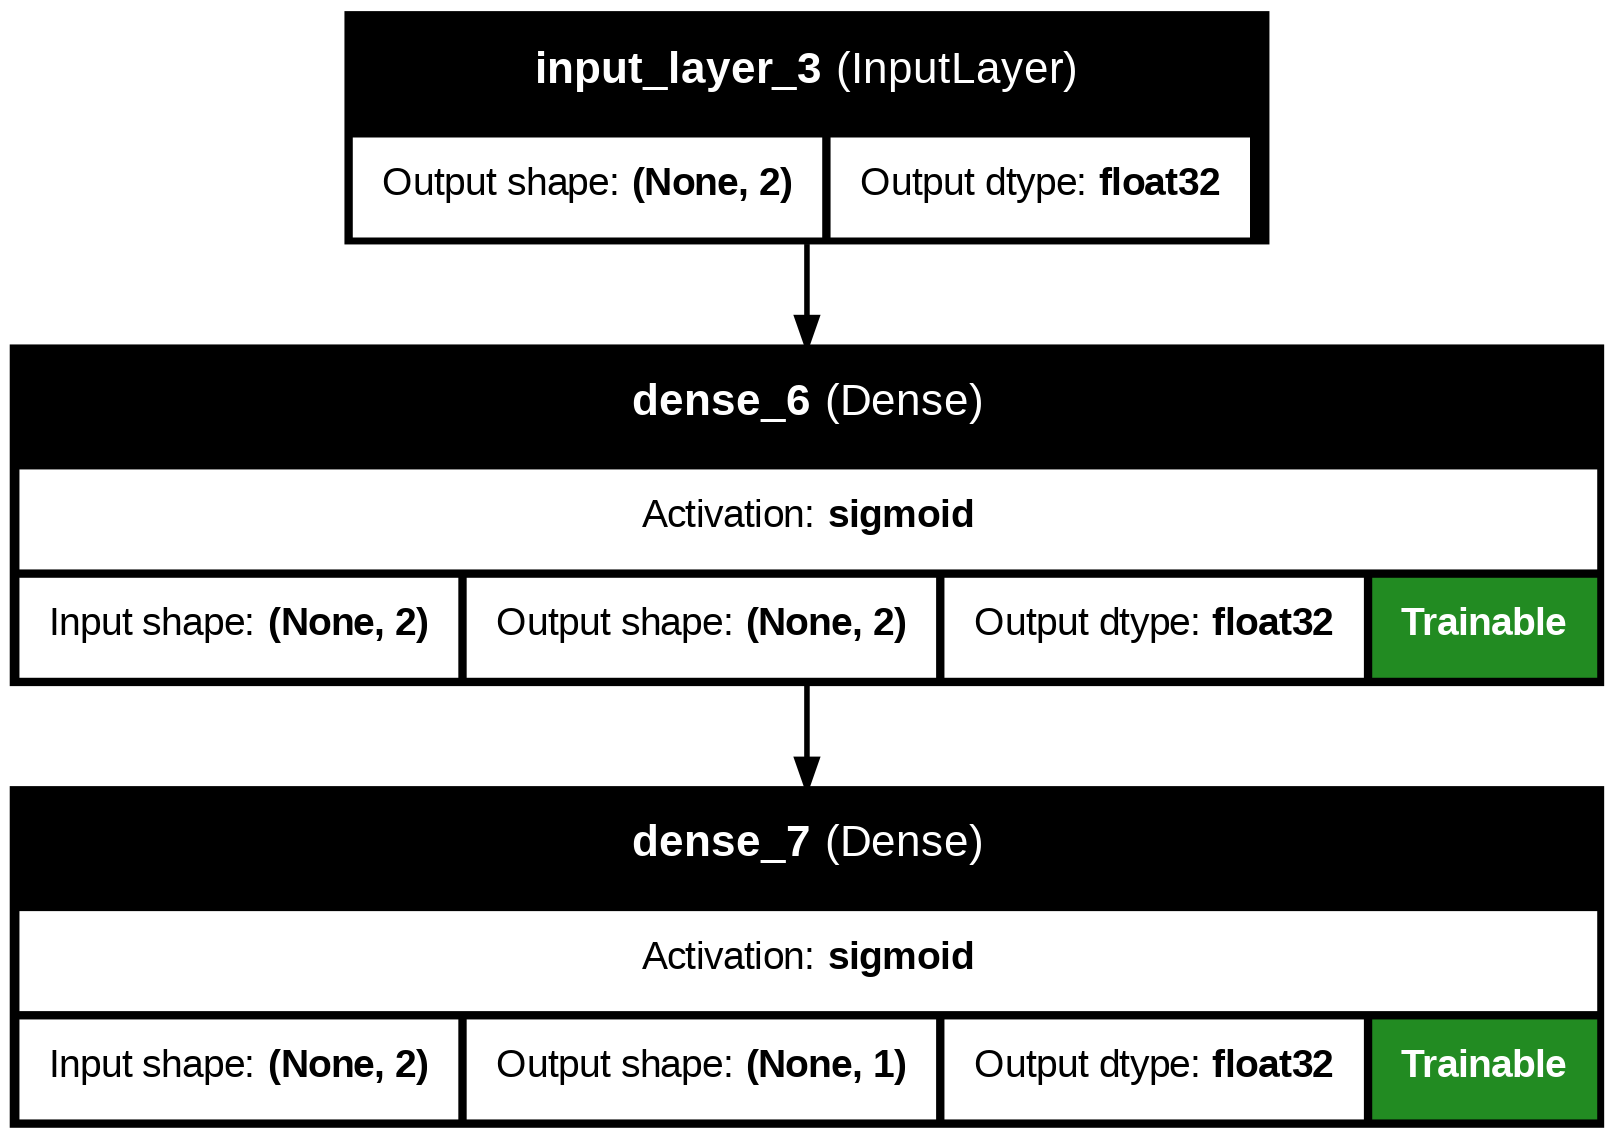

In [63]:
#구축이 완료된 모델의 형태를 그림으로 도식화 가능
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)
# 여기서 T의 의미는 trainable true 이다.
# 아래 위의 실행 결과에서 "None"은 입력으로 제공될 관측값의 수가 사전에 제한되지 않아서
# 2개의 성분으로 구성된 입력값(특징 벡터)를 여러 개 제공할 수 있다는 의미로 이해하자.

### 모델 학습 과정


In [50]:
history = model.fit(train__X, train_Y, epochs=2000, batch_size=3)
# 여러분이 epoch를 조절할 수 있다, history로 학습을 정의하여 다음에 나올 시각화 코드로 학습 과정을 표현해보자.
history

ValueError: Unrecognized data type: x=[[0, 0], [0, 1], [1, 0], [1, 1]] (of type <class 'list'>)

In [64]:
history = model.fit(train__X_np, train_Y_np, epochs=2000, batch_size=3)
history

Epoch 1/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5556 - loss: 0.6939 
Epoch 2/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5556 - loss: 0.6929
Epoch 3/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5556 - loss: 0.6920
Epoch 4/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5556 - loss: 0.6918
Epoch 5/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7222 - loss: 0.6926
Epoch 6/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7222 - loss: 0.6947
Epoch 7/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1667 - loss: 0.6983    
Epoch 8/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4444 - loss: 0.7035
Epoch 9/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4444 - loss: 0.7099
Epoch 10/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4444 - loss: 0.7174
Epoch 11/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4444 - loss: 0.7257
Epoch 12/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accu

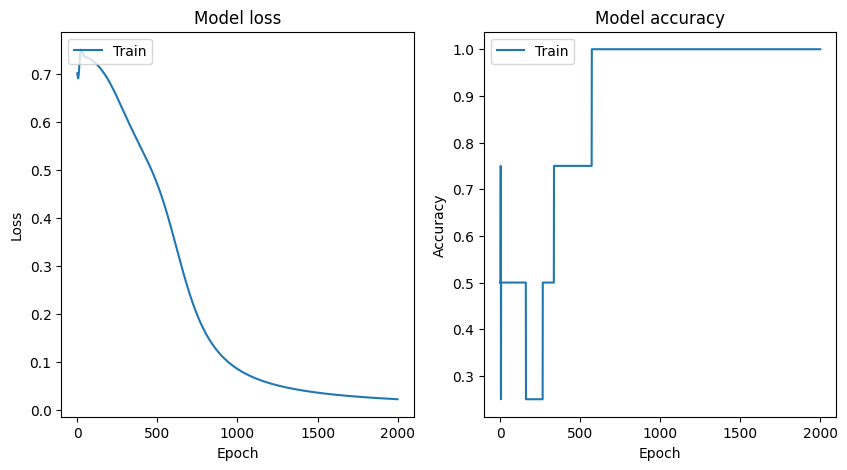

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# 훈련 과정 시각화 (손실)
ax1.plot(history.history['loss'])
ax1.set_title('Model loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(['Train', 'Test'], loc='upper left')

# 훈련 과정 시각화 (정확도)
ax2.plot(history.history['accuracy'])
ax2.set_title('Model accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(['Train', 'Test'], loc='upper left')

plt.show()

### 모델 성능을 검증 데이터로 평가

In [66]:
print('Final Output : ', model.predict(train__X_))
## 4가지 데이터에 대한 예측 확률

ValueError: Unrecognized data type: x=[[0, 0], [0, 1], [1, 0], [1, 1]] (of type <class 'list'>)

In [67]:
print('Final Output : ', model.predict(train__X_np))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Final Output :  [[0.02719685]
 [0.972939  ]
 [0.98919433]
 [0.02288835]]


In [ ]:
# 테스트 데이터 정의
x_test = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_test = [[0],[1],[1],[0]]

# 모델에 테스트 데이터를 입력
loss, accuracy = model.evaluate(x_test, y_test)

print('Test loss:', loss)

# 기존에 배운 sklearn의 성능 지표 출력으로 모델을 검증한다
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(x_test, batch_size=1)
y_pred_bool = np.round(y_pred)

print("* 검증 데이터의 예측 결과")
print(y_pred_bool)


print("* Metrics") # accuracy를 관찰해보자.
print(classification_report(y_test, y_pred_bool, zero_division=0))

print("* Confusion matrix") # 혼동 행렬 confusion matrix를 관찰해보자.
cf = confusion_matrix(y_test, y_pred_bool)
ConfusionMatrixDisplay(cf).plot()

In [70]:
x_test = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_test = [[0],[1],[1],[0]]

x_test_np = np.array(x_test, dtype=np.float32)
y_test_np = np.array(y_test, dtype=np.float32)

In [71]:
loss, accuracy = model.evaluate(x_test_np, y_test_np)
print('Test loss:', loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0223
Test loss: 0.022256556898355484


In [72]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(x_test_np, batch_size=1)
y_pred_bool = np.round(y_pred)

print("* 검증 데이터의 예측 결과")
print(y_pred_bool)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 
* 검증 데이터의 예측 결과
[[0.]
 [1.]
 [1.]
 [0.]]


In [73]:
print("* Metrics")
print(classification_report(y_test_np, y_pred_bool, zero_division=0))

* Metrics
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



* Confusion matrix


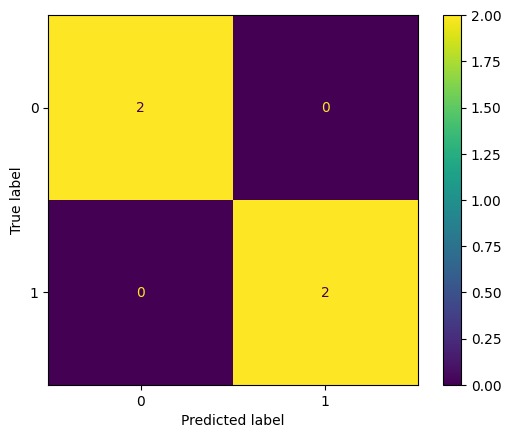

In [74]:
print("* Confusion matrix")
cf = confusion_matrix(y_test_np, y_pred_bool)
ConfusionMatrixDisplay(cf).plot()